# A4

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook
import copy
import Network 
import mnist_loader

# Q1: Autoencoder

## (a) Create and Train Network

In [2]:
# Create a network
import importlib
importlib.reload(Network)
net = Network.Network([784,100,30,3,30,100,784], type='regression')
# net = Network.Network([784,100,30,3,30,100,784], type='regression')

In [3]:
# Read in 2000 MNIST samples
train, validate, test = mnist_loader.load_data_wrapper()
train_in = np.array(train[0][:1000])
train_class = np.array(train[1][:1000])

In [4]:
# Train the network, uncomment if need to train the network
# progress = net.SGD(train_in, train_in, epochs=1000, lrate=0.1, batch_size=100)

Save and/or load the network

In [5]:
# net.Save('yourNet.net')

In [6]:
net = Network.Network.Load('yourNet.net')

## (b) View Reconstructions

<IPython.core.display.Javascript object>


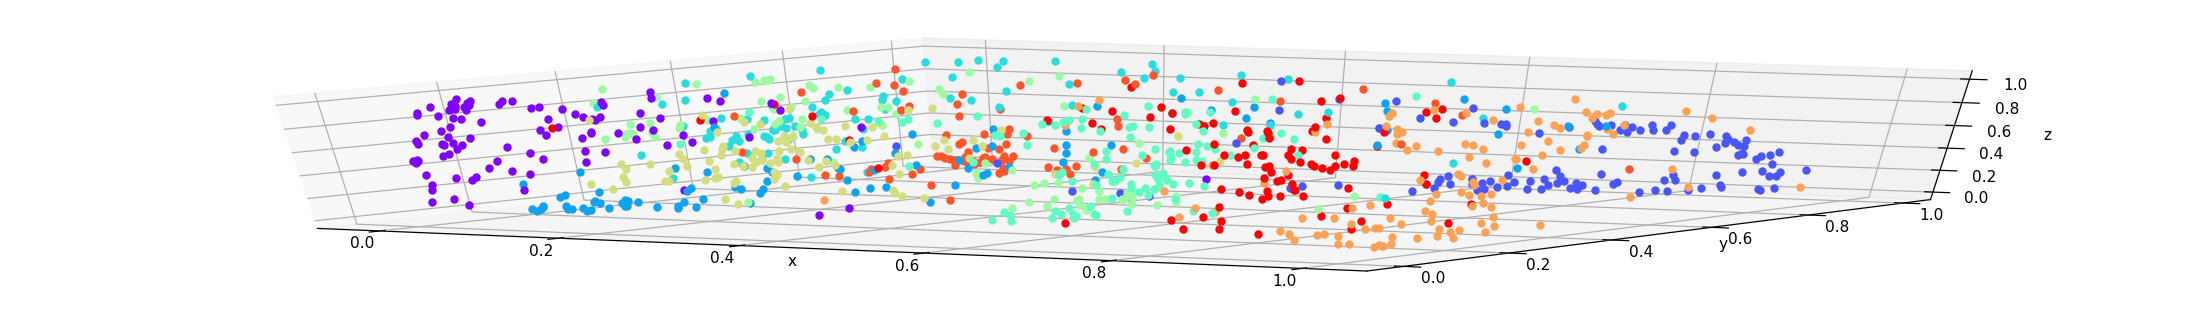

In [7]:
# Dispaly one of each digit class
# Plot both original and reconstruction

row_num = 2
col_num = 10
index = [0 for i in range(10)]
for label_idx, label in enumerate(train_class):
    cat = int(np.where(label == 1.)[0])
    index[cat] = label_idx if index[cat] == 0 else index[cat]
    if all([e != 0 for e in index]):
        break
        
# fig, axes = plt.subplots(row_num,col_num)
# plt.axis('off')

fig, axes = plt.subplots(row_num,col_num,figsize=(20,3))

# plt.axis('off')
for i,idx in enumerate(index):
    axes[0,i].imshow(train_in[idx].reshape(28,28),cmap='gray')
    axes[1,i].imshow(net.FeedForward(train_in[idx]).reshape(28,28),cmap='gray')
#     axes[0,i].get_yaxis().set_visible(False)
#     axes[0,i].get_xaxis().set_visible(False)
#     axes[1,i].get_yaxis().set_visible(False)
#     axes[1,i].get_xaxis().set_visible(False)
    
plt.tight_layout()
plt.show()


## (c) Plot Embeddings

In [8]:
activities = []
for t in train_in:
    net.FeedForward(t)
    activities.append(net.lyr[3].h)
activities = np.array(activities)
# the category, 0 for number 0, ..... 9 for number 9
color_label = np.array([list(np.where(i==1.)[0]) for i in train_class])
# randomly generate 10 color
colors = cm.rainbow(np.linspace(0, 1, 10))

In [9]:
color_label = np.array([list(np.where(i==1.)[0]) for i in train_class])
points = np.hstack([activities,color_label])
# [x,y,z, cat] , cat = [0-9]
fig = plt.figure(1, figsize=[8,8])
fig.clf()
ax = plt.axes(projection='3d')
for point in points:
    ax.scatter3D(point[0], point[1], point[2],color = colors[int(point[3])] )
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

In [10]:
# # convert label to colors...
# color_label = np.array([colors[int(i)] for i in color_label])
# # [x,y,z rgb_color]
# act_label = np.hstack([activities,color_label])
# fig = plt.figure(3, figsize=[20,20])
# fig.clf()
# ax = plt.axes(projection='3d')

# for point in act_label:

#     ax.scatter3D(point[0], point[1], point[2],color = np.array(point[:3]) )
# # ax.scatter3D(activities[:,0], activities[:,1], activities[:,2],color = 'purple')
# ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

In [11]:
# # Plot the embedding space

# # Here is some code to plot things in 3D
# fig = plt.figure(3, figsize=[8,8])
# fig.clf()
# ax = plt.axes(projection='3d')
# x = np.random.rand(5,3)
# ax.scatter3D(x[:,0], x[:,1], x[:,2], color='blue');
# ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

## (d) Reconstructions

In [12]:
net = Network.Network.Load('autoencoder.net')
print(len(net.lyr))
for i in net.lyr:
    print(i.N)

7
784
100
30
3
30
100
784


<IPython.core.display.Javascript object>


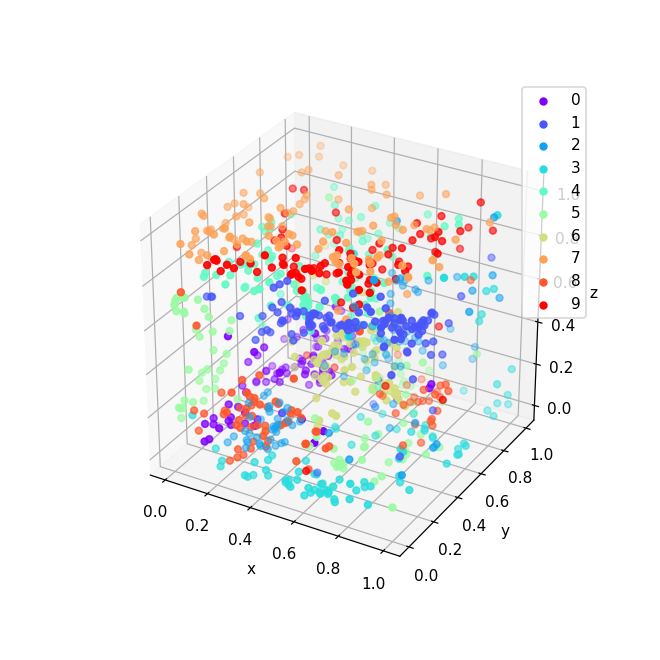

In [13]:
# (i)
activities = []
for t in train_in:
    net.FeedForward(t)
    activities.append(net.lyr[3].h)
activities = np.array(activities)

# the category, 0 for number 0, ..... 9 for number 9
# [x,y,z, cat] , cat = [0-9]
cat = np.array([list(np.where(i==1.)[0]) for i in train_class])
points = np.hstack([activities,cat])

# np array of points in a dict, key is the number
point_dict = {}
for i in range(10):
    ps = points[np.where(points[:,3] == np.float(i))]
    point_dict[i] = ps 
fig = plt.figure(2, figsize=(6,6))
fig.clf()
ax = plt.axes(projection='3d')
# for point in points:
#     ax.scatter3D(point[0], point[1], point[2],color = colors[int(point[3])])
# ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

for i in point_dict:
    pt = point_dict[i]
    ax.scatter3D(pt[:,0], pt[:,1], pt[:,2],color = colors[i], label = i )
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');
ax.legend()

## d (i)

In [14]:
list_a = points[np.where(np.abs(points[:,0]-0.99)<0.02)]
list_a = list_a[np.where(np.abs(list_a[:,1]-0.99)<0.02)]
list_a = list_a[np.where(np.abs(list_a[:,2]-0.18)<0.02)]
print(list_a)

[[0.99825729 0.99927692 0.19140124 3.        ]]


In [15]:
list_b = points[np.where(np.abs(points[:,0]-0.15)<0.02)]
list_b = list_b[np.where(np.abs(list_b[:,1]-0.10)<0.02)]
list_b = list_b[np.where(list_b[:,3]==np.float(3))]
print(list_b)

[[0.13959493 0.08954221 0.03299037 3.        ]]


<IPython.core.display.Javascript object>


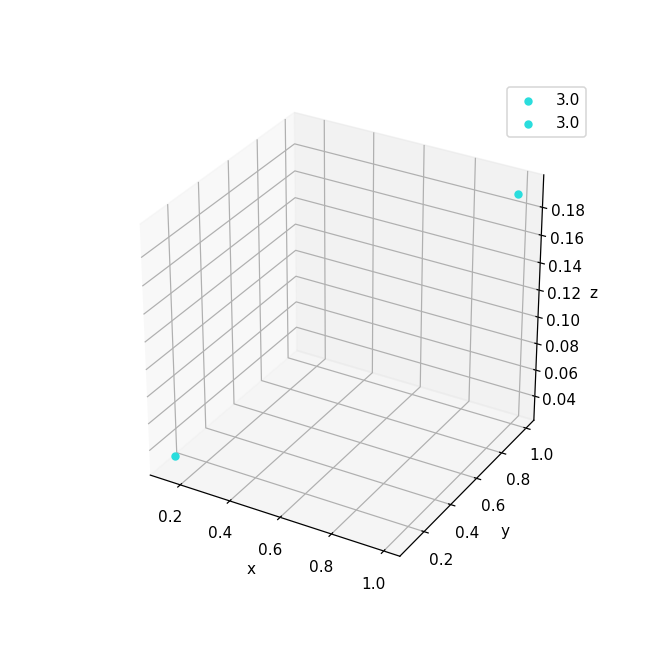

(2, 4)


In [16]:
fig = plt.figure(3, figsize=(6,6))
fig.clf()
pts = np.vstack([list_b,list_a])
print(pts.shape)
ax = plt.axes(projection='3d')
# for point in pts:
#     ax.scatter3D(point[0], point[1], point[2],color = colors[int(point[3])])
ax.scatter3D(list_a[:,0], list_a[:,1],list_a[:,2], color = colors[int(list_a[0,3])], label= list_a[0,3])
ax.scatter3D(list_b[:,0], list_b[:,1],list_b[:,2], color = colors[int(list_b[0,3])], label= list_b[0,3])
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');
ax.legend()


x		y		z	average
[[0.99825729 0.99927692 0.19140124 3.        ]]
x		y		z	average
[[0.13959493 0.08954221 0.03299037 3.        ]]


<IPython.core.display.Javascript object>


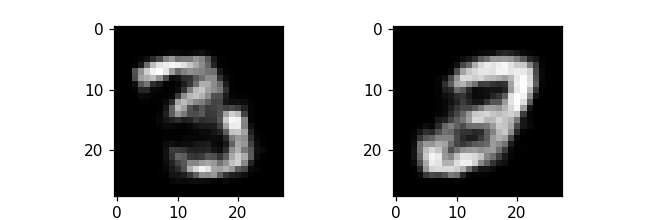

In [17]:
print('x\t\ty\t\tz\taverage')
print(list_a)
print('x\t\ty\t\tz\taverage')
print(list_b)
# remove the tag
list_aa = list_a[0,:-1]
list_bb = list_b[0,:-1]

res_a = net.FeedForwardFrom(3,np.array(list_aa))
res_b = net.FeedForwardFrom(3,np.array(list_bb))

fig, (axes1,axes2) = plt.subplots(1,2,figsize=(6,2))

axes1.imshow(res_a.reshape(28,28),cmap='gray')

axes2.imshow(res_b.reshape(28,28),cmap='gray')


## d (ii)

In [18]:
list_a = points[np.where(np.abs(points[:,0]-0.05)<0.05)]
list_a = list_a[np.where(np.abs(list_a[:,1]-0.2)<0.05)]
# list_a = list_a[np.where(np.abs(list_a[:,2]-0.18)<0.05)]
list_a = list_a[np.where(list_a[:,3]==np.float64(5))]
print('x\t\ty\t\tz\tint')
print(list_a)

x		y		z	int
[[0.01560315 0.18472497 0.46996658 5.        ]
 [0.04445417 0.15576895 0.19436133 5.        ]
 [0.01387208 0.17530525 0.26895626 5.        ]
 [0.06852028 0.2073147  0.2772883  5.        ]
 [0.01377851 0.19666684 0.29524656 5.        ]
 [0.09042593 0.24113395 0.3397393  5.        ]
 [0.06453521 0.20965533 0.22962767 5.        ]
 [0.04281083 0.18034087 0.23641332 5.        ]
 [0.09923756 0.15373412 0.44785489 5.        ]
 [0.01556486 0.16025588 0.51487755 5.        ]
 [0.0687193  0.1524899  0.35046033 5.        ]
 [0.09377963 0.16039301 0.5287236  5.        ]]


In [19]:
list_b = []
for i in points:
    if abs(i[0]-0.05) < 0.1 and abs(i[0]-0.2) < 0.1 and int(i[3]) != 5:
        list_b.append(i)
list_b = np.array(list_b)

b_vals = set([i[3] for i in list_b])
print(b_vals)

{0.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0}


In [20]:
# lets pick 4.0

list_b = list_b[np.where(list_b[:,3]==np.float64(8))]
list_b = list_b[np.where(np.abs(list_b[:,2]-0.2)<0.1)]
list_mean_a = np.mean(list_a,axis = 0)
list_mean_b = np.mean(list_b,axis = 0)
print(list_a)
print('==================')
print(list_b)
print('------------------')
print(list_mean_a)
print(list_mean_b)

[[0.01560315 0.18472497 0.46996658 5.        ]
 [0.04445417 0.15576895 0.19436133 5.        ]
 [0.01387208 0.17530525 0.26895626 5.        ]
 [0.06852028 0.2073147  0.2772883  5.        ]
 [0.01377851 0.19666684 0.29524656 5.        ]
 [0.09042593 0.24113395 0.3397393  5.        ]
 [0.06453521 0.20965533 0.22962767 5.        ]
 [0.04281083 0.18034087 0.23641332 5.        ]
 [0.09923756 0.15373412 0.44785489 5.        ]
 [0.01556486 0.16025588 0.51487755 5.        ]
 [0.0687193  0.1524899  0.35046033 5.        ]
 [0.09377963 0.16039301 0.5287236  5.        ]]
[[1.43539666e-01 1.36047828e-01 2.73271599e-01 8.00000000e+00]
 [1.14908775e-01 7.64679573e-03 1.54728130e-01 8.00000000e+00]
 [1.47209510e-01 6.81444594e-04 2.48486225e-01 8.00000000e+00]]
------------------
[0.05260846 0.18148198 0.34612631 5.        ]
[0.13521932 0.04812536 0.22549532 8.        ]


<IPython.core.display.Javascript object>


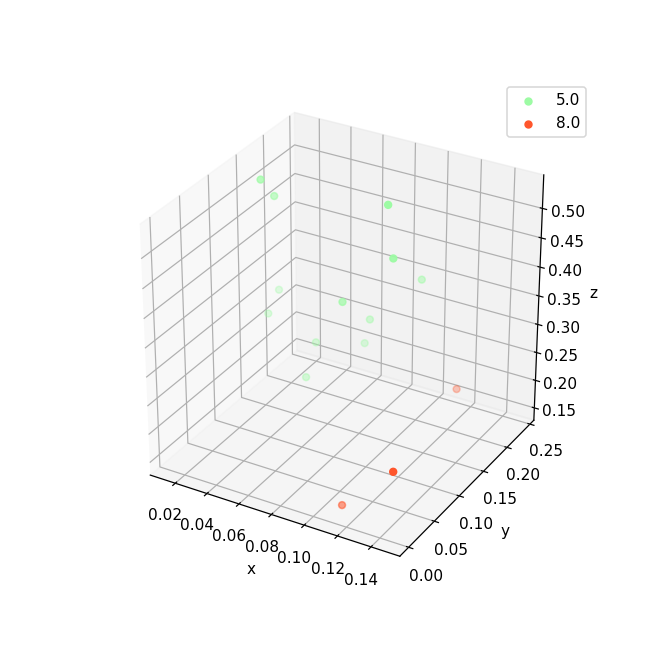

(15, 4)


In [21]:
fig = plt.figure('some points of 5 and 8', figsize=(6,6))
fig.clf()
pts = np.vstack([list_b,list_a])
print(pts.shape)
ax = plt.axes(projection='3d')
# for point in list_a:
#     ax.scatter3D(point[0], point[1], point[2], color = colors[int(point[3])], label= list_a[0,3])
# for point in list_b:
#     ax.scatter3D(point[0], point[1], point[2], color = colors[int(point[3])], label= list_b[0,3])
ax.scatter3D(list_a[:,0], list_a[:,1],list_a[:,2], color = colors[int(list_a[0,3])], label= list_a[0,3])
ax.scatter3D(list_b[:,0], list_b[:,1],list_b[:,2], color = colors[int(list_b[0,3])], label= list_b[0,3])
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');
ax.legend()

mean of points of 5
x		y		z
[0.99825729 0.99927692 0.19140124]
x		y		z
mean of points of 8
[0.13959493 0.08954221 0.03299037]


<IPython.core.display.Javascript object>


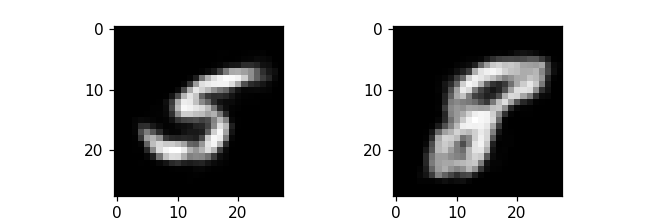

In [22]:

# remove the category
point_a = list_mean_a[:-1]
point_b = list_mean_b[:-1]
print('mean of points of %d'%int(list_mean_a[-1]))
print('x\t\ty\t\tz')
print(list_aa)
print('x\t\ty\t\tz')
print('mean of points of %d'%int(list_mean_b[-1]))
print(list_bb)

res_a = net.FeedForwardFrom(3,np.array(point_a))
res_b = net.FeedForwardFrom(3,np.array(point_b))

fig, (axes1,axes2) = plt.subplots(1,2,figsize=(6,2))
axes1.imshow(res_a.reshape(28,28),cmap='gray')
axes2.imshow(res_b.reshape(28,28),cmap='gray')


## d (iii)

In [23]:
list_a = points[np.where(np.abs(points[:,0]-0.3)<0.1)]
list_a = list_a[np.where(np.abs(list_a[:,1]-0.2)<0.1)]
list_a = list_a[np.where(np.abs(list_a[:,1]-0.2)<0.1)]

# print('x\t\ty\t\tz\tint')
# print(list_a)
print('within a sphere whose center is (0.3,0.2,0.2) and radius is 0.1')
print('category\tcount')
nums = set([j[3] for j in list_a])
for num in nums:
    count = np.count_nonzero(list_a[np.where(list_a[:,3]==np.float(num))][:,3])
    print("{:4d}\t\t{:4d}".format(int(num),count))
print('we choose 2 and 7') 
print('---------------------------')
print('pick the two categories with most count, which are 2 and 7')

within a sphere whose center is (0.3,0.2,0.2) and radius is 0.1
category	count
   2		  27
   3		   1
   4		   8
   7		  11
   8		   4
   9		   7
we choose 2 and 7
---------------------------
pick the two categories with most count, which are 2 and 7


<IPython.core.display.Javascript object>


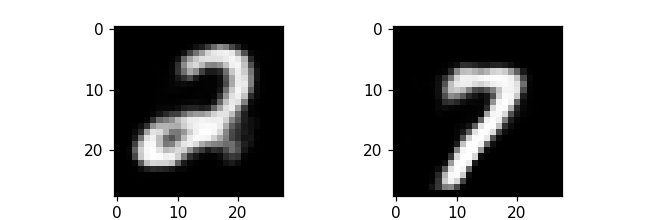

In [24]:
list_2 = list_a[np.where(list_a[:,3] == np.float(2))]
list_7 = list_a[np.where(list_a[:,3] == np.float(7))]
list_mean_2 = np.mean(list_2,axis = 0)
list_mean_7 = np.mean(list_7,axis = 0)

point_2_plot = list_mean_2[:-1]
point_7_plot = list_mean_7[:-1]

res_2 = net.FeedForwardFrom(3,np.array(point_2_plot))
res_7 = net.FeedForwardFrom(3,np.array(point_7_plot))

fig, (axes1,axes2) = plt.subplots(1,2,figsize=(6,2))
axes1.imshow(res_2.reshape(28,28),cmap='gray')
axes2.imshow(res_7.reshape(28,28),cmap='gray')

# Q2: BPTT Derivations

## (a) $\frac{\partial E}{\partial V}$

$$\frac{\partial E}{\partial V} = \frac{\partial E}{\partial y}\frac{\partial y}{\partial z}\frac{\partial z}{\partial V}$$

$$\frac{\partial E}{\partial y} = \frac{\sum_{i=1}^{\tau}{C\left(y^i,t^i \right)}}{\partial V}
=\sum_{i=1}^{\tau}{\frac{\partial C\left(y^i,t^i \right)}{\partial y^i}}$$

$$\frac{\partial y}{\partial z} = \frac{\sigma(z)}{\partial z} = \sigma^{'}(z)$$
$$\frac{\partial y^i}{\partial z^i} = \sigma^{'}(z^i)$$

$$\frac{\partial z}{\partial V} = \frac{\partial (Vh+c)}{\partial V} = (h)^T $$
$$\frac{\partial z^i}{\partial V} = \frac{\partial (V\cdot (h^i)^T+c)}{\partial V} = (h^i)^T $$

$$\frac{\partial E}{\partial V} =\sum_{i=1}^{\tau}{\frac{\partial E}{\partial y^i}\frac{\partial y^i}{\partial z^i}\frac{\partial z^i}{\partial V}}
 =\sum_{i=1}^{\tau}\left({\frac{\partial C\left(y^i,t^i \right)}{\partial y^i}}\odot \sigma^{'}(z^i)\right)(h^i)^T$$

## (b) $\frac{\partial E}{\partial U}$

$$\frac{\partial E}{\partial U} = \frac{\partial E}{\partial h}\frac{\partial h}{\partial s}\frac{\partial s}{\partial U}$$

$$\frac{\partial E}{\partial h} = \sum_{i=1}^{\tau}\frac{\partial E}{\partial h^i}$$

$$\frac{\partial h}{\partial s} = \frac{\partial \sigma(s)}{\partial s} = \sigma^{'}(s)$$
$$\frac{\partial h^i}{\partial s^i} = \frac{\partial \sigma(s^i)}{\partial s^i} = \sigma^{'}(s^i)$$

$$\frac{\partial s}{\partial U} = \frac{\partial Ux+Wh+b}{\partial U} = \frac{\partial Ux}{\partial U}= x^T$$
$$\frac{\partial s^i}{\partial U} = \frac{\partial Ux^i+Wh^i+b}{\partial U} = \frac{\partial Ux^i}{\partial U}= (x^i)^T$$

$$\frac{\partial E}{\partial U} = \sum_{i=1}^{\tau}\left(\frac{\partial E}{\partial h^i}\frac{\partial h^i}{\partial s^i}\frac{\partial s^i}{\partial U}\right)
=\sum_{i=1}^{\tau}\left(\frac{\partial E}{\partial h^i} \odot \sigma^{'}(s^i)\right)(x^i)^T
$$

## (c) $\frac{\partial E}{\partial W}$

$$\frac{\partial E}{\partial W} = \frac{\partial E}{\partial h^{i+1}}\frac{\partial h^{i+1}}{\partial s^{i+1}}\frac{\partial s^{i+1}}{\partial W}$$

$$\frac{\partial h^{i+1}}{\partial s^{i+1}}=\frac{\partial \sigma{s^{i+1}}}{\partial s^{i+1}} = \sigma^{'}(s^{i+1})$$

$$\frac{\partial s^{i+1}}{\partial W}=\frac{\partial Ux^{i+1} +Wh^i + b}{\partial W} = (h^i)^T$$

$$\frac{\partial E}{\partial W}
=\sum_{i=1}^{\tau-1} \frac{\partial E}{\partial h^{i+1}}\frac{\partial h^{i+1}}{\partial s^{i+1}}\frac{\partial s^{i+1}}{\partial W}
= \sum_{i=1}^{\tau-1}\left(\frac{\partial E}{\partial h^{i+1}} \odot \sigma^{'}(s^{i+1})\right)(h^{i})^T $$

## (d) $\frac{\partial E}{\partial b}$

YOUR ANSWER HERE

$$\frac{\partial E}{\partial b} = \frac{\partial E}{\partial h^i}\frac{\partial h^i}{\partial s^i}\frac{\partial s^i}{\partial b}$$

$$\frac{\partial h^i}{\partial s^i} =\frac{\partial \sigma(s^i)}{\partial s^i}=\sigma^{'}(s^i)$$

$$\frac{\partial h^i}{\partial s^{i+1}}=\frac{\partial Ux^i +Wh^{i-1} + b}{\partial b} = 1$$

$$\frac{\partial E}{\partial W}
= \sum_{i=1}^{\tau} \frac{\partial E}{\partial h^i}\frac{\partial h^i}{\partial s^i}\frac{\partial s^i}{\partial b} 
= \sum_{i=1}^{\tau}\left(\frac{\partial E}{\partial h^i} \odot \sigma^{'}(s^i)\right) $$

# Q3: RNN

## Read in the data

The code below creates two lists:
  - `sentences`, and
  - `next_chars`
  
Each list element represents a sequences of characters. There are 3 ways to represent a character:
1. As a string, eg. `'b'`
2. As an index to a character set, eg. `2`
3. As a one-hot vector, eg. `[0, 0, 1, 0, ...]`

The lists `sentences` and `next_chars` store the characters as indices. The utility functions
  - `char2vec`
  - `index2vec`
  - `vec2char`
  - `vec2index`
  
transform the characters between the 3 representations. You can also use the dictionaries `char_indices` and `indices_char` to convert between a string character and and index. The code below contains some examples.

In [29]:
import re
text = open('origin_of_species.txt').read().lower()
chars = sorted(list(set(text)))
chars.insert(0, "\0") #Add newline character
vocab_size = len(chars)

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
idx = [char_indices[c] for c in text]

# Let's simplify it by keeping only letters and spaces
filt_idx = []
for i in idx:
    if i<=24:
        filt_idx.append(2)
    elif i>24:
        filt_idx.append(i)
blah = ''.join([indices_char[f] for f in filt_idx])
text = re.sub(' +', ' ', blah)
chars = sorted(list(set(text)))
vocab_size = len(chars)
print('Character set: '+''.join(chars)+' (first char is a space)')

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
idx = [char_indices[c] for c in text]

print('There are '+str(vocab_size)+' characters in our character set')

''.join(indices_char[i] for i in idx[:70])

def char2vec(c):
    v = np.zeros(vocab_size)
    v[char_indices[c]] = 1.
    return v

def index2vec(i):
    v = np.zeros(vocab_size)
    v[i] = 1.
    return v

def vec2index(v):
    i = np.argmax(v)
    return i

def vec2char(v):
    return indices_char[vec2index(v)]

'''Form the dataset in sentences'''
sentences_length = 10
sentences = []
next_chars = []
for i in range(0, 5000 - sentences_length + 1):
    sentences.append(idx[i: i + sentences_length]) #Assume a sentence is made of X characters
    next_chars.append(idx[i + 1: i + sentences_length + 1]) #Offset by 1 to the right for the target

sentences = np.concatenate([[np.array(o)] for o in sentences[:-2]])
next_chars = np.concatenate([[np.array(o)] for o in next_chars[:-2]])
sentences.shape, next_chars.shape

def read_sentence(vec):
    return ''.join(indices_char[i] for i in vec)

print('Here is how you can view one of the samples:')
print('Sample input: ['+read_sentence(sentences[3])+']')

Character set:  abcdefghijklmnopqrstuvwxyz (first char is a space)
There are 27 characters in our character set
Here is how you can view one of the samples:
Sample input: [the origin]


## Some utility functions

In [25]:
def sigma(z):
    return np.clip(z, a_min=0, a_max=None)  # ReLU
    #return 1./(1+np.exp(-z))  # use this for logistic

def sigma_primed(y):
    return np.clip(np.sign(y), a_min=0, a_max=1)  # Derivative of ReLU
    #return y*(1.-y)  # use this for logistic

def softmax(z):
    ez = np.exp(z)
    denom = np.sum(ez)
    return ez / denom

def CrossEntropy(y, t):  # should rename it to CategoricalCE
    return -sum(t*np.log(y))

## (a) Complete BPTT

In [26]:
class RNN():
    
    def __init__(self, dims, seq_length=10):
        '''
         Input:
           dims is [X, H, Y], where the input has layer has X neurons, the
                hidden layer has H neurons, and the output layer has Y neurons.
           seq_length is how many steps to unroll the RNN through time
                (this is the same as tau in the lecture notes)
        '''
        self.X, self.H, self.Y = dims
        self.seq_length = seq_length
        # Input layer
        self.xs = [np.zeros(self.X) for x in range(seq_length)] # activity
        # Hidden layer
        self.hs = [np.zeros(self.H) for x in range(seq_length)] # activity
        # Output layer
        self.ys = [np.zeros(self.Y) for x in range(seq_length)] # activity
        
        # Connection weights
        self.U = np.random.normal(size=[self.H, self.X])/np.sqrt(self.X) # input->hidden
        self.W = np.random.normal(size=[self.H, self.H])/np.sqrt(self.H) # hidden->hidden
        self.V = np.random.normal(size=[self.Y, self.H])/np.sqrt(self.H) # hidden->output
        self.b = np.zeros(self.H) # biases for hidden nodes
        self.c = np.zeros(self.Y) # biases for output nodes
        
    def ForwardTT(self, seq_in):
        '''
         i = ForwardTT(seq_in)
        
         Propagates the RNN forward through time, saving all the intermediate
         states that will be needed for backprop through time (BPTT).
        
         Input:
           seq_in is a vector of indecies, with self.seq_length elements.
        
         Output:
           i is the index of the character predicted to follow the input.
         
         This method's main purpose is to update the states of the activites
         in the time-unrolled network.
        '''
        self.xs[0] = index2vec(seq_in[0]) # convert to character vector
        
        # Starting input current for hidden nodes
        ss = np.dot(self.U, self.xs[0]) + self.b
        self.hs[0] = sigma(ss)  # Activation of hidden nodes
        
        # Input current for output nodes
        zs = np.dot(self.V, self.hs[0]) + self.c
        self.ys[0] = softmax(zs)  # Activation of output nodes
        
        # Now process forward in time
        for i in range(1, self.seq_length):
            self.xs[i] = index2vec(seq_in[i])  # input vector
            
            # Input current for hidden nodes, including recurrent connections
            ss = np.dot(self.U, self.xs[i]) + np.dot(self.W, self.hs[i-1]) + self.b
            self.hs[i] = sigma(ss)  # Activation
            
            # Input current for output nodes
            zs = np.dot(self.V, self.hs[i]) + self.c
            self.ys[i] = softmax(zs)  # Activation
            
        # Might as well output the final state of the output
        return vec2index(self.ys[-1])
    
    def Generate(self, n=1):
        '''
         c = Generate(n=1)
         
         Runs the RNN from the last state after running ForwardTT, outputting
         the next n characters.
         
         Input:
           n is the number of characters you want to predict
           
         Output:
           c is a string of n characters
        '''
        y = self.ys[-1]  # Final output of ForwardTT
        c = vec2char(y)  # Convert it to a character string
        h = self.hs[-1]  # Starting with last hidden state...
        # Loop forward in time
        # (no need to record states, since we won't be doing BPTT)
        for nn in range(n-1):
            x = copy.copy(y)  # Use last output as next input
            
            # Input current for hidden nodes
            s = np.dot(self.U, x) + np.dot(self.W, h) + self.b
            h = sigma(s)  # Activation
            
            # Input current for output nodes
            z = np.dot(self.V, h) + self.c
            y = softmax(z)  # Activation
            
            # And add the next character to our output string
            c += vec2char(y)
            
        return c
            
    def BPTT(self, seq_in, seq_out):
        '''
         BPTT(seq_in, seq_out)
         
         Performs backprop through time on one sample given by the input and
         output sequence.
         
         Input:
           seq_in is a vector of indices specifying the input sequence of
                   characters.
           seq_out is a vector of indices specifying the output sequence of
                   characters. Typically, seq_out is the same as seq_in, but
                   shifted by 1 character.
         
         Output:
           None, but the connection weights and biases are updated.
        '''
        # Initialize gradients to zero
        self.dEdV = np.zeros(np.shape(self.V))
        self.dEdW = np.zeros(np.shape(self.W))
        self.dEdU = np.zeros(np.shape(self.U))
        self.dEdb = np.zeros(np.shape(self.b))
        self.dEdc = np.zeros(np.shape(self.c))
        
        # ===================
        # ===================
        # =  YOUR CODE HERE =
        # ===================
        # ===================


        
    def Evaluate(self, train_in, train_out):
        '''
         loss = Evaluate(train_in, train_out)
         
         Evaluates the network on the supplied dataset.
         
         Input:
           train_in is a list of input sequences (see ForwardTT for format of input)
           train_out is the corresponding list of output sequences
           
         Output:
           loss is the average cross entropy
        '''
        val = 0.
        for x, t in zip(train_in, train_out):
            self.ForwardTT(x)
            for i in range(self.seq_length):
                val += CrossEntropy(self.ys[i], index2vec(t[i]))
        return val/len(train_in)
 

    def Train(self, train_in, train_out, kappa=0.05, epochs=1):
        '''
         Train(train_in, train_out, kappa=0.05, epochs=1)
         
         Performs epochs of gradient descent, performing BPTT after each sample.
         
         Input:
           train_in and train_out is the training dataset
           kappa is the learning rate
           epochs is the number of times to go through the dataset
           
         Output:
           None, but the connection weights and biases are updated
        '''
        # Loop over epochs
        for e in range(epochs):
            
            # Shuffle the training data
            data_shuffled = list(zip(train_in, train_out))
            np.random.shuffle(data_shuffled)
            
            for x, t in data_shuffled:
                self.ForwardTT(x)  # Forward through time
                self.BPTT(x, t)    # Backprop through time
                # Note that BPTT starts by resetting the gradients to zero.
                
                # Apply update to connection weights and biases
                self.V -= kappa*self.dEdV
                self.U -= kappa*self.dEdU
                self.W -= kappa*self.dEdW
                self.b -= kappa*self.dEdb
                self.c -= kappa*self.dEdc

            print('Epoch '+str(e)+', Loss = '+str(self.Evaluate(train_in, train_out)))

## (b) Create the RNN

In [27]:
# YOUR CODE HERE
#net = RNN(...)

## (c) Train

In [28]:
# YOUR CODE HERE
# net.Train(...)

In [29]:
# You might opt to have more than one train command, using different
# learning rates and numbers of epochs. Each one builds on the results
# from the last run.
#net.Train(...)

## (d) Evaluate

In [30]:
n = 38
b.ForwardTT(sentences[n])
blah = read_sentence(sentences[n])
print('Input:      '+blah)
print('Prediction: '+blah+b.Generate(5))
print('Actual:     '+blah+read_sentence(sentences[n+10]))

NameError: name 'b' is not defined

In [ ]:
blah = 'harles dar'
blah = read_sentence(sentences[np.random.randint(len(sentences))])
x = [char_indices[c] for c in blah]
b.ForwardTT(x)
print(blah)
print(blah+b.Generate(10))

In [ ]:
# YOUR CODE HERE